# Plot Kohn-Shan eigenvalues


Number of bands (For each spin):                                           
   NBAND = 900                                         
                                                           
Number of k-points                                         
   NKPOINT = 1                                         
                                                           
Number of occupied bands (spin up)                         
   NBAND-OCC-UP = 600                         
                                                           
Number of unoccupied bands (spin up)                       
   NBAND-UNOCC-UP = 300       

Number of partial occupied bands (spin up)                       
    NBAND-PAR-OCC-UP = 0             
                                                           
Number of occupied bands (spin down)                       
   NBAND-OCC-DOWN = 599                     
                                                           
Number of unoccupied bands (spin down)     

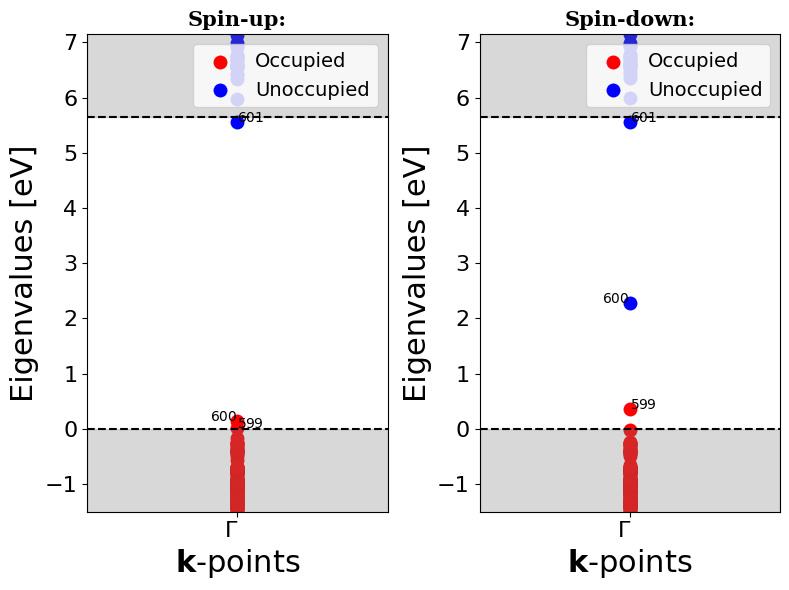

In [1]:
from VaspDefAnalysis.plotter.plot_KS_eigenvalues import PlotKohnShamEigenvalue

# The VBM and CBM (PBE)
#VBM = 5.9732   # [eV]
#CBM = 10.0299  # [eV]

# The VBM and CBM (HSE06) 
VBM = 5.3092    # [eV]
CBM = 10.9541   # [eV]

# Path to the vasprun.xml (VASP) file of the defect calculation 
vasprun_path = '/home/luis/master_thesis_uio/thesis_project/output_from_vasp_saga/project_AlN/calcualtion_steps/supercell/hybrid-hse06-5x5x3/defect/C_N-C_Al/C_N-C_Al_+1/vasprun.xml'

# Creat an istance of the VaspRunAnalysis class
fig = PlotKohnShamEigenvalue.get_plot_KS_eigenvalues(vasprun_path=vasprun_path,
                                                     VBM=VBM,
                                                     CBM=CBM,
                                                     show_band_index=True,
                                                     #band_indix_label_limit=(-2,-1),
                                                     #y_limit=(-1,-2)
                                                     #layout="vertical",
                                                     #figsize=(8,6),
                                                     )
# Kohn-Shan  eigenvalues analysis 
from VaspDefAnalysis.defect.KS_eigenvalues_analysis import EigenvaluesAnalysis
eigenvalies_analysis = EigenvaluesAnalysis(vasprun_path=vasprun_path)
electronic_state_band_info = eigenvalies_analysis.get_electorinic_state_band_inf()
print(electronic_state_band_info)

# Other alternative way to plot Kohn-Shan eigenvalies

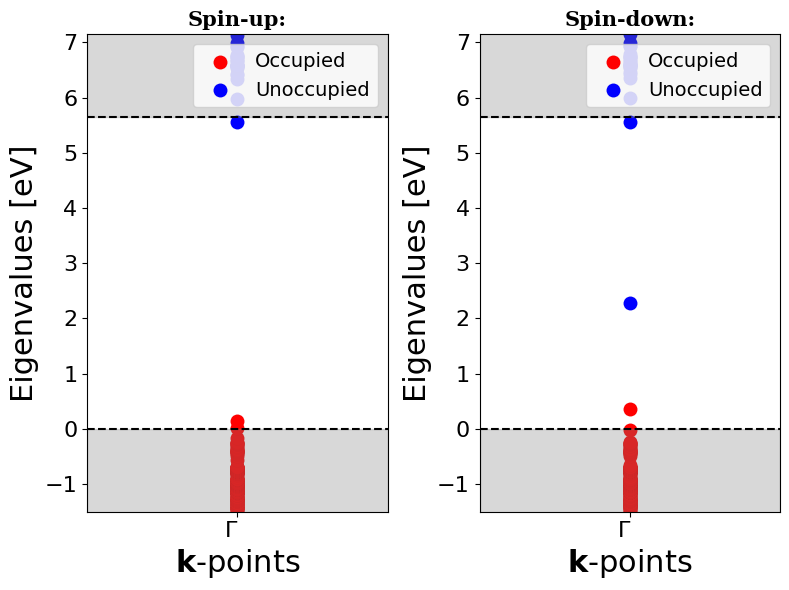

In [2]:
from VaspDefAnalysis.read_vasp.vasprun_analysis import VaspRunAnalysis
from VaspDefAnalysis.plotter.plot_KS_eigenvalues import PlotKohnShamEigenvalue
from VaspDefAnalysis.utils.path_save_output import SaveOutput

save = SaveOutput('/home/luis/Downloads/assignmeant_MENA_curso/mena_project/')

# Creat an istance of the VaspRunAnalysis class
vasprum_id = '/home/luis/master_thesis_uio/thesis_project/output_from_vasp_saga/project_AlN/calcualtion_steps/supercell/hybrid-hse06-5x5x3/defect/C_N-C_Al/C_N-C_Al_+1/vasprun.xml'
vasprun_analysis = VaspRunAnalysis(vasprun_path=vasprum_id)
eigenvalues_dict, occupancy_dict = vasprun_analysis.get_Kohn_Sham_eigenvalues_and_occupancy()
kpoints_dict = vasprun_analysis.get_kpoint_values()

# Create an instance of PlotEigenvalue
plotter = PlotKohnShamEigenvalue(eigenvalues_dict, occupancy_dict, kpoints_dict)

# The VBM and CBM (PBE)
#VBM = 5.9732   # [eV]
#CBM = 10.0299  # [eV]

# The VBM and CBM (HSE06) 
VBM = 5.3092    # [eV]
CBM = 10.9541   # [eV]

# Plot eigenvalues
fig = plotter.plot_KS_eigenvalues(VBM=VBM,
                                  CBM=CBM,
                                  show_fill_up=True,
                                  #show_band_index=True,
                                  #band_indix_label_limit=(-2,-1),
                                  #y_limit=(-1,-2)
                                  #layout="vertical",
                                  #figsize=(8,6),
                                  )

In [6]:
import os
#import matplotlib.pyplot as plt

# Extract the directory where the vasprun.xml is located
directory = os.path.dirname(vasprun_path)

# Extract the name of the parent directory
parent_dir_name = os.path.basename(directory)

# Define the output file path (you can change the file name if necessary)
output_file = os.path.join(directory,f"Kohn_Sham_eigenvalues_{parent_dir_name}.png")

# Save the plot in the same directory as the vasprun.xml
fig.savefig(output_file)

# Optionally, show the plot (if needed)
#plt.figure(fig)
#plt.show(fig)
